# 1、图像分类数据集（FASHION-MNIST）

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys

from d2l import mxnet as d2l

In [8]:
mnist_train = torchvision.datasets.FashionMNIST(root='E:\jupyter\Datasets\FashionMNIST',train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='E:\jupyter\Datasets\FashionMNIST',train=False, download=False, transform=transforms.ToTensor())

print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [13]:
feature, label = mnist_train[0] # 这个就是第一张图片
print(feature.shape, label) # Channel x Height X Width

torch.Size([1, 28, 28]) 9


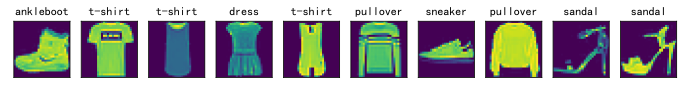

In [15]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankleboot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 􁬯􁯾􁌱_􁤒􁐏􀱯􀕪􀮺􁊼􀒁􀓧􀖵􁊠􀒂􁌱􀝒􁰁
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0]) # 图片
    y.append(mnist_train[i][1]) # 标签
show_fashion_mnist(X, get_fashion_mnist_labels(y))

# 2、softmax的从零实现

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys

from d2l import mxnet as d2l

In [19]:
# 1、获取和读取数据
mnist_train = torchvision.datasets.FashionMNIST(root='E:\jupyter\Datasets\FashionMNIST',train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='E:\jupyter\Datasets\FashionMNIST',train=False, download=False, transform=transforms.ToTensor())

print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [20]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)